# Tackling the Problem of predicting countries without medals

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
athletes_data = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv', encoding='latin1')
hosts_data = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv', encoding='latin1')
medal_data = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv', encoding='latin1')
programs_data = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv', encoding='latin1')

### We can look at countries that went from not winning medals to winning medals, and create a model based on that to predict which countries will win in the future

In [67]:
medal_data.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [77]:
athletes_data.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [6]:
programs_data.head()

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [64]:
def get_athletes_per_country(country, year):
    athletes = {'Rishabh Mallidi', 'Rohith Muthukumar', 'Arnav Lahoti'} # used to avoid duplicate athletes
    athlete_count = 0
    for athlete in athletes_data.itertuples():
        name = athlete[1]
        athlete_country = athlete[3]
        athlete_year = athlete[5]
        if((athlete_country == country) and (year == athlete_year)):
            if(name not in athletes):
                athlete_count+=1
                athletes.add(name)
    return athlete_count


In [ ]:
def get_events_participated_per_country():
    pass

In [132]:
def get_countries_without_medals():
    teams_without_medals = []
    for team in medal_data.itertuples():
        medals = team[6]
        if(medals == 0):
            teams_without_medals.append(team[2])
    return teams_without_medals

In [133]:
teams_without_medals = get_countries_without_medals()
print(len(teams_without_medals))

0


### From the above code - we can see that all teams have won medals for any of the years

In [ ]:
count = get_athletes_in_event_per_country('United States', 2024)
print(count)

619


#### Go through the various events and see when a country first won

In [112]:
athletes_data.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [125]:
def get_country_event_medals(event, country):
    years = []
    medals = []
    for athlete in athletes_data.itertuples():
        athlete_country = athlete[3]
        athlete_event = athlete[8]
        athlete_result = athlete[9]
        athlete_year = athlete[5]
        # print(athlete_year not in years)
        if((event == athlete_event) and (athlete_country == country) and (athlete_year not in years)):
            years.append(athlete_year)
            if(str.lower(athlete_result) == 'no medal'):
                medals.append(0)
            else:
                medals.append(1)
    return (years, medals)

[2000, 1984, 2008]
[1, 0, 0]


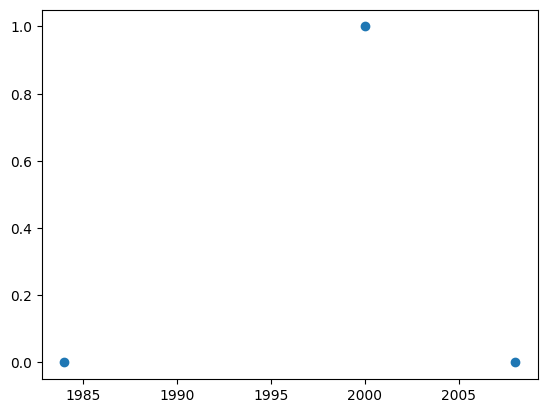

In [126]:
years, medals = get_country_event_medals('Football Men\'s Football', 'Cameroon')
print(years)
print(medals)
plt.scatter(years, medals)
plt.show()

# consider the relative number of athletes
# host country indicator
# related events